In [1]:
# MONTH 2
from sklearn import datasets
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import argparse
import uuid
import cv2
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import argparse
import glob
import mahotas
from scipy.spatial import distance as dist
import numpy as np
import mahotas
import cv2
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import argparse
import imutils
import cv2
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2

ImportError: No module named mahotas

# [super] Building Your Own Custom Object Detector


# 2.1 What are object detectors [theory]

# 2.1.1 An itroduction to object detection [theory]

# 2.1.2 Template matching 

In [ ]:
# load the source and template image
source = cv2.imread('data/source_01.jpg')
template = cv2.imread('data/template.jpg')
source = cv2.imread('data/source_wally.png')
template = cv2.imread('data/template_wally.png')

(tempH, tempW) = template.shape[:2]
 
# find the template in the source image
result = cv2.matchTemplate(source, template, cv2.TM_CCOEFF)
(minVal, maxVal, minLoc, (x, y)) = cv2.minMaxLoc(result)

In [ ]:
cv2.rectangle(source, (x, y), (x + tempW, y + tempH), (0, 255, 255), 20)
plt.figure(figsize=(20,20))
plt.imshow(source)
plt.figure()
plt.imshow(template)

In [ ]:
# import the necessary packages

# import the necessary packages
from __future__ import print_function
from imutils import paths
from scipy.io import loadmat
from skimage import io
import argparse
import dlib

 
    
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-c", "--class", required=True,
#     help="Path to the CALTECH-101 class images")
# ap.add_argument("-a", "--annotations", required=True,
#     help="Path to the CALTECH-101 class annotations")
# ap.add_argument("-o", "--output", required=True,
#     help="Path to the output detector")
# args = vars(ap.parse_args())

args = {}
args['class'] = 'data/stop_sign_images/'
args['output'] = 'data/stop_sign_detector_output.svm'
args['annotations'] = 'data/stop_sign_annotations/'


args['class'] = 'data/sunflowers/sunflower_images/'
args['output'] = 'data/stop_sign_detector_output.svm'
args['annotations'] = 'data/sunflowers/sunflower_annotations/'


# grab the default training options for our HOG + Linear SVM detector, then initialize the
# list of images and bounding boxes used to train the classifier
print("[INFO] gathering images and bounding boxes...")
options = dlib.simple_object_detector_training_options()
images = []
boxes = []
 
# loop over the image paths
for imagePath in paths.list_images(args["class"]):
    # extract the image ID from the image path and load the annotations file
    imageID = imagePath[imagePath.rfind("/") + 1:].split("_")[1]
    imageID = imageID.replace(".jpg", "")
    p = "{}/annotation_{}.mat".format(args["annotations"], imageID)
    annotations = loadmat(p)["box_coord"]

    # loop over the annotations and add each annotation to the list of bounding
    # boxes
    bb = [dlib.rectangle(left=long(x), top=long(y), right=long(w), bottom=long(h))
            for (y, h, x, w) in annotations]
    boxes.append(bb)

    # add the image to the list of images
    images.append(io.imread(imagePath))
    
# train the object detector
print("[INFO] training detector...")
detector = dlib.train_simple_object_detector(images, boxes, options)
 
# dump the classifier to file
print("[INFO] dumping classifier to file...")
detector.save(args["output"])
 
# visualize the results of the detector
# win = dlib.image_window()
# win.set_image(detector)
# dlib.hit_enter_to_continue()

detector = dlib.simple_object_detector('data/stop_sign_detector_output.svm')


for testingPath in paths.list_images('data/sunflowers/sunflower_test/'):
    # load the image and make predictions
    image = cv2.imread(testingPath)
    boxes = detector(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # loop over the bounding boxes and draw them
    for b in boxes:
        (x, y, w, h) = (b.left(), b.top(), b.right(), b.bottom())
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2)

    # show the image
    plt.figure()
    plt.imshow(image)
#     cv2.imshow("Image", image)
#     cv2.waitKey(0)

# [super] Content-Based Image Retrieval

# 3.1: What is Content-Based Image Retrieval?


The three types of image search engines.  
Important terms such as feature extraction, feature vector, indexing, distance metrics, querying, and result set.  
The 4 steps of building any CBIR system.  
How to evaluate a CBIR system.  
The difference between CBIR and machine learning.  

precison = total_relevant/total_retrieved    
recal = total_relevant/total_relevant_in_db  
f-score =(2 x precison * recall) / (precision + recall)    


# 3.2: Your first image search engine [project]


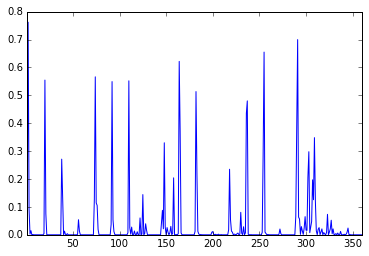

In [4]:
pd.read_csv('projects/ImageSearchEngine_32/index.csv', header=None).iloc[300][1:].plot()
#python search.py --index index.csv --dataset ../../data/ukbench --relevant ../../data/ukbench/relevant.json --query ../../data/ukbench/ukbench00302.jpg

# 3.3 The 4 steps of building any image search engine [theory]



# 3.3.1 Defining your image descriptor [theory]

# 3.3.2 Feature extracting and indexing

Different types of image descriptors:
    
- COLOR ( histograms, color statistics)  
- Texture ( Harlick, Local Binary Patterns) 
- Shape  ( Zernike Moments, Hu Moments, HOG)

Specialized data strucutres to store features:
- kd-tree  
- random projection forest  
- inverted index  

# 3.3.3 Defining your similarity metric


In [9]:
from sklearn.metrics import euclidean_distances, hinge_loss
A = [0.64, 0.13, 0.41, 0.29, 0.56, 0.99, 0.11, 0.30]
B = [0.18, 0.87, 0.32, 0.71, 0.44, 0.27, 0.02, 0.41]


euclidean_distances(A, B)
A = [0.77, 0.43, 0.96, 0.92, 0.56, 0.65, 0.84, 0.21]
B = [0.04, 0.96, 0.87, 0.98, 0.39, 0.78, 0.67, 0.33]
hist_inter = lambda x,y: np.sum(np.minimum(x, y))
hist_inter(A, B)

A = np.array([0.16, 0.04, 0.12, 0.03, 0.14, 0.17, 0.06, 0.27])
B = np.array([0.08, 0.12, 0.07, 0.13, 0.04, 0.22, 0.27, 0.08])

from sklearn.metrics import pairwise_distances


def chi2_distance(histA, histB, eps=1e-10):
    return 0.5 * np.sum(((histA - histB) ** 2) / (histA + histB + eps))

A = [0.81, 0.84, 0.31, 0.13, 0.96, 0.48, 0.58, 0.65]
B = [0.82, 0.31, 0.50, 0.38, 0.74, 0.59, 0.62, 0.94]

pairwise_distances(A, B, metric='cosine')

A = [1, 1, 0, 1, 0, 1, 0, 1]
B = [0, 0, 0, 0, 0, 0, 0, 1]

pairwise_distances(A, B, metric='hamming')

/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  

array([[ 0.5]])

# 3.3.4: Searching [theory]


inputy image - > image descriptor - > feature_vector - > search

# [super] Image Classification and Machine Learning


# 4.3 k-Nearest neighbor classifiation

In [14]:
mnist = datasets.load_digits()
 
# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
    mnist.target, test_size=0.5, random_state=42)
 
# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
    test_size=0.1, random_state=84)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 808
validation data points: 90
testing data points: 899


In [15]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in xrange(1, 30, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# find the value of k that has the largest accuracy
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))

k=1, accuracy=97.78%
k=3, accuracy=98.89%
k=5, accuracy=97.78%
k=7, accuracy=97.78%
k=9, accuracy=97.78%
k=11, accuracy=98.89%
k=13, accuracy=97.78%
k=15, accuracy=96.67%
k=17, accuracy=95.56%
k=19, accuracy=96.67%
k=21, accuracy=96.67%
k=23, accuracy=95.56%
k=25, accuracy=95.56%
k=27, accuracy=95.56%
k=29, accuracy=95.56%
k=3 achieved highest accuracy of 98.89% on validation data


In [16]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        82
          1       0.97      1.00      0.98        89
          2       0.99      1.00      0.99        83
          3       0.99      0.96      0.97        93
          4       0.99      0.99      0.99        93
          5       0.99      0.98      0.98        99
          6       1.00      1.00      1.00        98
          7       0.96      0.99      0.97        87
          8       0.99      0.98      0.98        83
          9       0.98      0.96      0.97        92

avg / total       0.98      0.98      0.98       899



/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  

I think that digit is: 7
I think that digit is: 9
I think that digit is: 3
I think that digit is: 3


/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


I think that digit is: 8


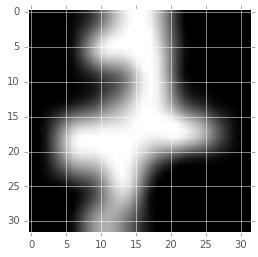

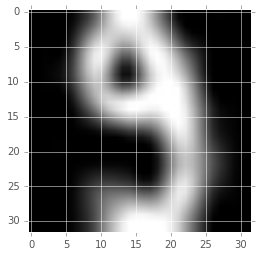

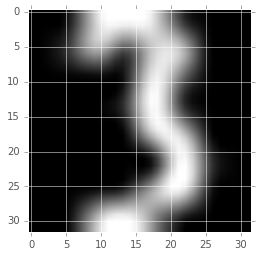

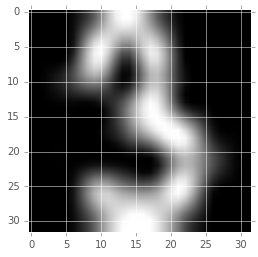

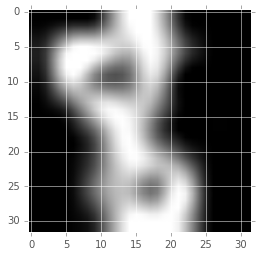

In [17]:
# loop over a few random digits
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    # grab the image and classify it
    image = testData[i]
    prediction = model.predict(image)[0]

    # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
    # then resize it to 32 x 32 pixels so we can see it better
    image = image.reshape((8, 8)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

    # show the prediction
    plt.figure()
    print("I think that digit is: {}".format(prediction))
    plt.imshow(image,cmap='gray')

# 4.4.1 Logistic regression

In [ ]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# plot the step function
plt.style.use("ggplot")
plt.figure()
plt.title("Step Function")
plt.plot([0.0, 2.3, 2.3, 5.0],[0.0, 0.0 ,1.0 ,1.0])
plt.ylim(-0.1,1.1)
plt.show()

# plot the first sigmoid function
x = np.arange(-6, 6, 0.1)
y = 1 / (1 + (np.e ** (-x)))
plt.figure()
plt.plot(x, y)
plt.title("Sigmoid (Zoomed In)")
plt.xlim([-6, 6])
plt.show()

# plot the second sigmoid function
x = np.arange(-50, 50, 0.1)
y = 1 / (1 + (np.e ** (-x)))
plt.figure()
plt.plot(x, y)
plt.title("Sigmoid (Zoomed Out)")
plt.xlim([-50, 50])
plt.show()

In [ ]:
# USAGE
# python train_and_test.py

# import the necessary packages
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import imutils
import cv2

# grab a small subset of the Labeled Faces in the Wild dataset, then construct
# the training and testing splits (note: if this is your first time running this
# script it may take awhile for the dataset to download -- but once it has downloaded
# the data will be cached locally and subsequent runs will be substantially faster)
print("[INFO] fetching data...")
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, funneled=True, resize=0.5)
(trainData, testData, trainLabels, testLabels) = train_test_split(dataset.data, dataset.target,
	test_size=0.25, random_state=42)

# train the model and show the classification report
print("[INFO] training model...")
model = LogisticRegression()
model.fit(trainData, trainLabels)
print(classification_report(testLabels, model.predict(testData),
    target_names=dataset.target_names))

# # loop over a few random images
# for i in np.random.randint(0, high=testLabels.shape[0], size=(10,)):
#     # grab the image and the name, then resize the image so we can better see it
#     image = testData[i].reshape((62, 47))
#     name = dataset.target_names[testLabels[i]]
#     image = imutils.resize(image.astype("uint8"), width=image.shape[1] * 3, inter=cv2.INTER_CUBIC)

#     # classify the face
#     prediction = model.predict(testData[i])[0]
#     prediction = dataset.target_names[prediction]
#     print("[PREDICTION] predicted: {}, actual: {}".format(prediction, name))
#     cv2.imshow("Face", image)
#     cv2.waitKey(0)

# 4.4.2 SVM

In [19]:
# USAGE
# python classify.py

# import the necessary packages
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import numpy as np

# generate the XOR data
tl = np.random.uniform(size=(100, 2)) + np.array([-2.0, 2.0])
tr = np.random.uniform(size=(100, 2)) + np.array([2.0, 2.0])
br = np.random.uniform(size=(100, 2)) + np.array([2.0, -2.0])
bl = np.random.uniform(size=(100, 2)) + np.array([-2.0, -2.0])
X = np.vstack([tl, tr, br, bl])
y = np.hstack([[1] * len(tl), [-1] * len(tr), [1] * len(br), [-1] * len(bl)])

# construct the training and testing split by taking 75% of the data for training
# and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.25,
	random_state=42)

# train the linear SVM model, evaluate it, and show the results
print("[RESULTS] SVM w/ Linear Kernel")
model = SVC(kernel="linear")
model.fit(X, y)
print(classification_report(testLabels, model.predict(testData)))
print("")

# train the SVM + poly. kernel model, evaluate it, and show the results
print("[RESULTS] SVM w/ Polynomial Kernel")
model = SVC(kernel="poly", degree=2, coef0=1)
model.fit(X, y)
print(classification_report(testLabels, model.predict(testData)))

[RESULTS] SVM w/ Linear Kernel
             precision    recall  f1-score   support

         -1       0.43      0.52      0.47        44
          1       0.54      0.45      0.49        56

avg / total       0.49      0.48      0.48       100


[RESULTS] SVM w/ Polynomial Kernel
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00        44
          1       1.00      1.00      1.00        56

avg / total       1.00      1.00      1.00       100



/home/i008/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/i008/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


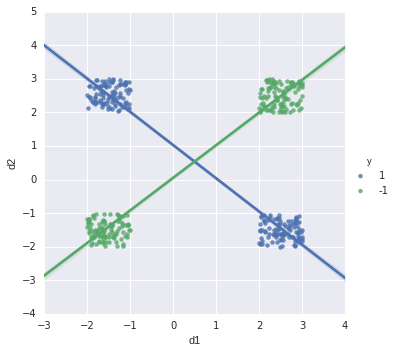

In [20]:
import seaborn as sns

df = pd.DataFrame(X)
df['y'] = pd.DataFrame(y)
df.columns = ['d1','d2','y']
sns.lmplot('d1','d2',df,'y', fit_reg=True)

# 4.4.3 DECISION TREES

In [ ]:
from sklearn.datasets import load_iris
df = load_iris()
df.keys()

# 4.4.4 Random Forrests

# [super] Automatic licencse plates recognition
# 6.2 The problem with ANPR datasets [theory]
# 6.3: Localizing license plates in images [project]

# [super] Image Descriptors

# 10.9: Understanding local features [theory]
# 10.10: Keypoint detectors [theory]


# 10.10.1: FAST


In [23]:
image = cv2.imread("data/grand_central_terminal.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detector_fast = cv2.FeatureDetector_create("FAST")
kps = detector_fast.detect(gray)

print "no of keypoints {}".format(len(kps))
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y ) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

    
plt.figure()
plt.imshow(image)

# 10.10.2: Harris


In [25]:
detector_harris = cv2.FeatureDetector_create("HARRIS")
kps = detector_harris.detect(gray)

print "no of keypoints {}".format(len(kps))
for kp in kps:

    r = int(0.1 * kp.size)
    (x, y ) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

    
plt.figure()
plt.imshow(image)

SyntaxError: invalid syntax (<ipython-input-25-bd34537f6120>, line 4)

# 10.10.3 GFTT

In [26]:
# import the necessary packages
import numpy as np
import cv2

# load the image and convert it to grayscale
# image = cv2.imread("next.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect GFTT keypoints in the image
detector = cv2.FeatureDetector_create("GFTT")
kps = detector.detect(gray)
print("# of keypoints: {}".format(len(kps)))

# loop over the keypoints and draw them
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

# show the image
plt.figure()
plt.imshow(image)


error: /home/i008/opencv/opencv-2.4.10/modules/imgproc/src/color.cpp:3739: error: (-215) scn == 3 || scn == 4 in function cvtColor


# 10.10.4: DoG


# of keypoints: 2420


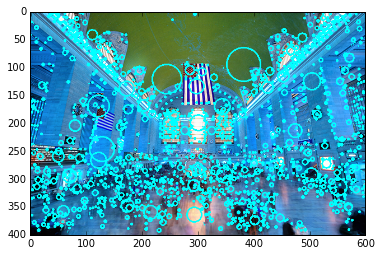

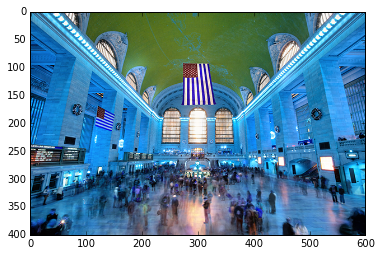

In [3]:
image = cv2.imread("data/grand_central_terminal.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect Difference of Gaussian keypoints in the image
detector = cv2.FeatureDetector_create("SIFT")
kps = detector.detect(gray)
print("# of keypoints: {}".format(len(kps)))
 
# loop over the keypoints and draw them
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(orig)

# 10.10.5 Fast Hessian

In [17]:

# import the necessary packages
from __future__ import print_function
import numpy as np
import cv2

# load the image and convert it to grayscale
image = cv2.imread("data/grand_central_terminal.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect Fast Hessian keypoints in the image
detector = cv2.FeatureDetector_create("SURF")
kps = detector.detect(gray)
print("# of keypoints: {}".format(len(kps)))

# loop over the keypoints and draw them
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

# show the image

# plt.figure(figsize=(20,20))
# plt.imshow(np.vstack([orig, image]))



# of keypoints: 2485


1

# 10.10.6: STAR

In [1]:

# import the necessary packages
from __future__ import print_function
import numpy as np
import cv2
 
# load the image and convert it to grayscale
image = cv2.imread("data/grand_central_terminal.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect STAR keypoints in the image
detector = cv2.FeatureDetector_create("STAR")
kps = detector.detect(gray)
print("# of keypoints: {}".format(len(kps)))
 
# loop over the keypoints and draw them
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)
 
# show the image
cv2.imshow("Images", np.hstack([orig, image]))
cv2.waitKey(0)


# of keypoints: 459


-1

# 10.10.7 MSER


In [3]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import cv2
 
# load the image and convert it to grayscale
image = cv2.imread("data/grand_central_terminal.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect MSER keypoints in the image
detector = cv2.FeatureDetector_create("MSER")
kps = detector.detect(gray)
print("# of keypoints: {}".format(len(kps)))
 
# loop over the keypoints and draw them
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

# show the image
# cv2.imshow("Images", np.hstack([orig, image]))
# cv2.waitKey(0)

# of keypoints: 608


# 10.10.8: Dense


In [5]:
# USAGE
# python detect_dense_simple.py

# import the necessary packages
from __future__ import print_function
import numpy as np
import argparse
import cv2

#  construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-s", "--step", type=int, default=6, help="step (in pixels) of the dense detector")
# ap.add_argument("-r", "--size", type=int, default=1, help="default diameter of keypoint")
# args = vars(ap.parse_args())

args = {}
args['step'] = 6
args['size'] = 1

# load the image and convert it to grayscale
image = cv2.imread("data/grand_central_terminal.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect Dense keypoints in the image
detector = cv2.FeatureDetector_create("Dense")
detector.setInt("initXyStep", args["step"])
print("using step size of: {}".format(detector.getInt("initXyStep")))
kps = detector.detect(gray)
print("# of keypoints: {}".format(len(kps)))

# loop over the keypoints and explicity adjust the keypoint size
for kp in kps:
    kp.size = args["size"]

# loop over the keypoints and draw them
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

# # show the image
# cv2.imshow("Images", np.hstack([orig, image]))
# cv2.waitKey(0)


# # USAGE
# # python detect_dense_simple.py

# # import the necessary packages
# from __future__ import print_function
# import numpy as np
# import argparse
# import cv2

# #  construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-s", "--step", type=int, default=28, help="step (in pixels) of the dense detector")
# args = vars(ap.parse_args())

# # load the image and convert it to grayscale
# image = cv2.imread("next.png")
# orig = image.copy()
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # detect the raw Dense keypoints in the image
# detector = cv2.FeatureDetector_create("Dense")
# detector.setInt("initXyStep", args["step"])
# print("using step size of: {}".format(detector.getInt("initXyStep")))
# rawKps = detector.detect(gray)
# kps = []

# # loop over the raw keypoints
# for rawKp in rawKps:
#     # loop over the various radii we are going to use
#     for r in (4, 8, 12):
#         # construct a keypoint manually and then update the keypoitns list
#         kp = cv2.KeyPoint(x=rawKp.pt[0], y=rawKp.pt[1], _size=r * 2)
#         kps.append(kp)

# # show some information regarding the number of keypoints detected
# print("# dense keypoints: {}".format(len(rawKps)))
# print("# dense + multi radii keypoints: {}".format(len(kps)))

# # loop over the keypoints and draw them
# for kp in kps:
#     r = int(0.5 * kp.size)
#     (x, y) = np.int0(kp.pt)
#     cv2.circle(image, (x, y), r, (0, 255, 255), 1)

# # show the image
# cv2.imshow("Images", np.hstack([orig, image]))
# cv2.waitKey(0)

using step size of: 6
# of keypoints: 6700


# 10.10.9 BRISK

# of keypoints: 916


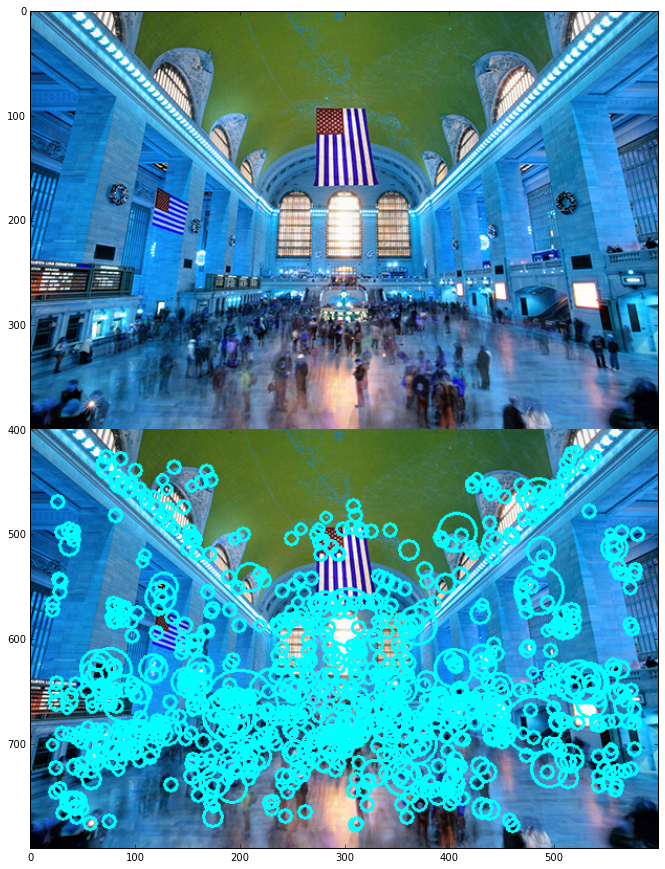

In [12]:

# import the necessary packages
from __future__ import print_function
import numpy as np
import cv2
 
# load the image and convert it to grayscale
image = cv2.imread("data/grand_central_terminal.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect BRISK keypoints in the image
detector = cv2.FeatureDetector_create("BRISK")
kps = detector.detect(gray)
print("# of keypoints: {}".format(len(kps)))
 
# loop over the keypoints and draw them
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

# show the image
plt.figure(figsize=(20,15))
plt.imshow(np.vstack([orig, image]))
# cv2.imshow("Images", np.hstack([orig, image]))
# cv2.waitKey(0)

# 10.10.10 ORB

of keypoints: 500


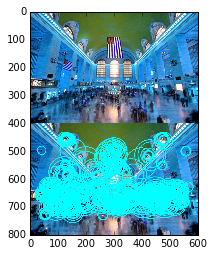

In [4]:
image = cv2.imread('data/grand_central_terminal.png')
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detector = cv2.FeatureDetector_create('ORB')
kps = detector.detect(gray)
print("of keypoints: {}".format(len(kps)))

for kp in kps:
    r = int(0.5 * kp.size)
    x, y = np.int0(kp.pt)
    cv2.circle(image, (x, y),r,(0, 255, 255), 2)

plt.imshow(np.vstack([orig, image]))


# 10.11: Local Invariant descriptors

For every detected keypoint we calculate some kind of metric (feature) that will describe the surrounding of the keypoint


# 10.11.1 SIFT
For every detected keypoint surroundings ( 16x16)  we calculate the  gradient magnitude and orientation for (4x4 cells) and than calculate the histoigram of each
 




2420
(2420, 128)


(array([ 87.,   6.,  10.,   6.,   4.,   4.,   0.,   1.,   2.,   8.]),
 array([   0. ,   13.9,   27.8,   41.7,   55.6,   69.5,   83.4,   97.3,
         111.2,  125.1,  139. ]),
 <a list of 10 Patch objects>)

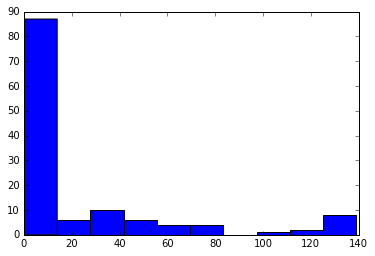

In [17]:
ima = 'data/grand_central_terminal.png'

detector = cv2.FeatureDetector_create("SIFT")
extractor = cv2.DescriptorExtractor_create("SIFT")

image = cv2.imread(ima)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kps = detector.detect(gray)
kps, descs = extractor.compute(gray, kps)

print(len(kps))
print(descs.shape)

plt.hist(descs[1])

# 10.11.2: RootSIFT


[INFO] # of keypoints detected: 2420
[INFO] feature vector shape: (2420, 128)


(array([ 58.,  12.,  15.,   8.,  10.,   3.,   7.,   2.,   3.,  10.]),
 array([ 0.        ,  0.02171263,  0.04342526,  0.0651379 ,  0.08685053,
         0.10856316,  0.13027579,  0.15198843,  0.17370106,  0.19541369,
         0.21712632]),
 <a list of 10 Patch objects>)

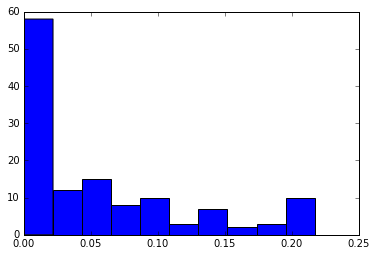

In [9]:
class RootSIFT:
    def __init__(self):
        # initialize the SIFT feature extractor
        self.extractor = cv2.DescriptorExtractor_create("SIFT")

    def compute(self, image, kps, eps=1e-7):
        # compute SIFT descriptors
        (kps, descs) = self.extractor.compute(image, kps)

        # if there are no keypoints or descriptors, return an empty tuple
        if len(kps) == 0:
            return ([], None)

        # apply the Hellinger kernel by first L1-normalizing and taking the
        # square-root
        descs /= (descs.sum(axis=1, keepdims=True) + eps)
        descs = np.sqrt(descs)

        # return a tuple of the keypoints and descriptors
        return (kps, descs)
    

image_p = 'data/grand_central_terminal.png'
    
# initialize the keypoint detector and local invariant descriptor
detector = cv2.FeatureDetector_create("SIFT")
extractor = RootSIFT()
 
# load the input image, convert it to grayscale, detect keypoints, and then
# extract local invariant descriptors
image = cv2.imread(image_p)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kps = detector.detect(gray)
(kps, descs) = extractor.compute(gray, kps)
 
# show the shape of the keypoints and local invariant descriptors array
print("[INFO] # of keypoints detected: {}".format(len(kps)))
print("[INFO] feature vector shape: {}".format(descs.shape))


plt.hist(descs[0])

# 10.11.3 SURF


2485
2485


(array([  3.,   1.,   6.,  42.,   1.,   1.,   2.,   3.,   4.,   1.]),
 array([-0.18266641, -0.12319636, -0.06372631, -0.00425626,  0.05521379,
         0.11468384,  0.17415389,  0.23362394,  0.29309399,  0.35256404,
         0.41203409]),
 <a list of 10 Patch objects>)

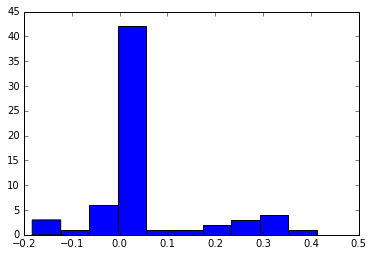

In [21]:


detector = cv2.FeatureDetector_create("SURF")
extractor = cv2.DescriptorExtractor_create("SURF")
 
# load the input image, convert it to grayscale, detect keypoints, and then
# extract local invariant descriptors
image = cv2.imread(image_p)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kps = detector.detect(gray)
(kps, descs) = extractor.compute(gray, kps)

print(len(kps))
print(len(descs))

plt.hist(descs[0])



# TODO 
Raspberry Pi Projects  
9.2: Setting up your Raspberry Pi Camera  
9.3: Accessing the Raspberry Pi camera and video stream  

10.10.6: STAR  
10.10.7: MSER  
10.10.8: Dense  
10.10.9: BRISK  
10.10.10: ORB 
10.11: Local invariant descriptors  
10.11.1: SIFT  
10.11.2: RootSIFT  
10.11.3: SURF   
10.11.4: Real-valued feature extraction and matching  

# 11.2: Face detection in images [todo] [project]


I found 0 face(s)


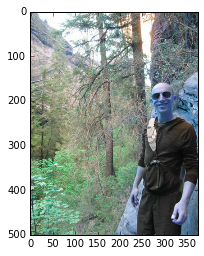

In [4]:


# import the necessary packages
import argparse
import cv2

# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-f", "--face", required=True, help="Path to where the face cascade resides")
# ap.add_argument("-i", "--image", required=True, help="Path to where the image file resides")
# args = vars(ap.parse_args())

args = {}
args['image'] = 'data/adrian_zion.jpg' 
args['face'] = 'arch/face_detection/cascades/haarcascade_frontalface_default.xml'



# import the necessary packages
import argparse
import cv2

# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# load the face detector and detect faces in the image
detector = cv2.CascadeClassifier(args["face"])
faceRects = detector.detectMultiScale(gray,scaleFactor=1.8, minNeighbors=5,
    minSize=(30, 30), flags = cv2.cv.CV_HAAR_SCALE_IMAGE)
print "I found %d face(s)" % (len(faceRects))
 
# loop over the faces and draw a rectangle around each
for (x, y, w, h) in faceRects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(image)
 


# 11.3: Face detection in video [todo] [project]